# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:
class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
    
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE
        i = 1
        while i < n + 1:
            
            positions[i] = positions[i-1] + self.pickStep()
            
            i += 1
            
        return positions

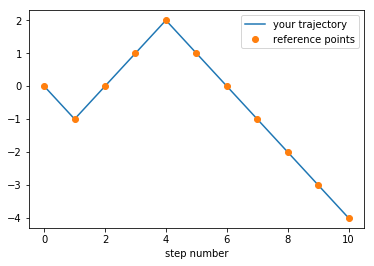

In [5]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

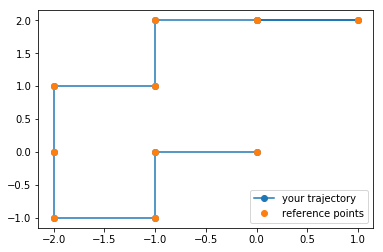

In [6]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

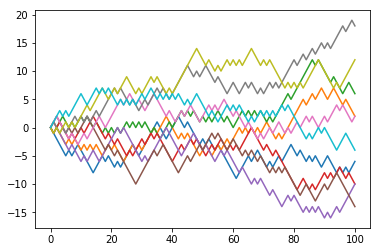

In [7]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


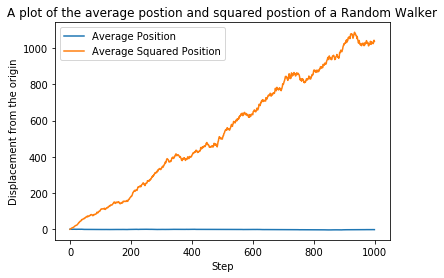

Text(0,0.5,'Displacement from the origin')

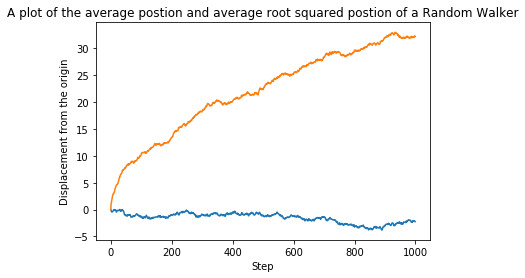

In [12]:
nsteps = 1000
ndim = 1
nwalkers = 100
w = walker(numpy.zeros(1), ndim)

step_x = [[] for _ in range(nsteps)]
step_x2 = [[] for _ in range(nsteps)]
avg_path = []
avg_path2 = []
avg_path2root = []

for i in range (nwalkers):
    a = w.doSteps(nsteps)
    a2 = a ** 2
    for n in range (nsteps):
        step_x[n].append(a[n])
        step_x2[n].append(a2[n])
     
    #print(range(nsteps+1))
    #print(len(a))
    #plt.plot(range(nsteps+1), a)

    
#print("a=", a)
#print("a2= ", a2)
    
for i in range (nsteps):
    a = numpy.average(step_x[i])
    a2 = numpy.average(step_x2[i])
    avg_path.append(a)
    avg_path2.append(a2)
    avg_path2root.append(numpy.sqrt(a2))
    
#print("avg_path=", avg_path)  
#print("avg_path2=", avg_path2)


plt.plot(range(nsteps), avg_path, label= 'Average Position')
plt.plot(range(nsteps), avg_path2, label= 'Average Squared Position')
plt.legend()
plt.title("A plot of the average postion and squared postion of a Random Walker")
plt.xlabel("Step")
plt.ylabel("Displacement from the origin")

plt.show()

plt.plot(range(nsteps), avg_path, label= 'Average Position')
plt.plot(range(nsteps), avg_path2root, label = 'Root Average Squared Position')
plt.title("A plot of the average postion and average root squared postion of a Random Walker")
plt.xlabel("Step")
plt.ylabel("Displacement from the origin")


**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


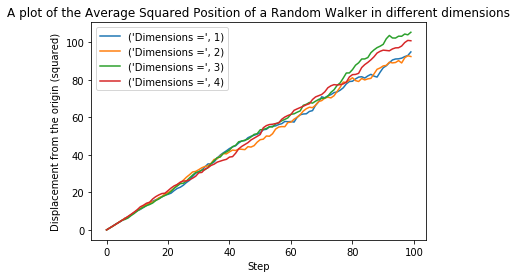

In [28]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)

w = walker(numpy.zeros(1), ndim)

for x in (dimensions):

    step_x = [[] for _ in range(nsteps)]
    
    avg_path_square = []
    
    for n in range(nwalkers):
        path = w.doSteps(nsteps)
        path_square= path**2
        
        #print(path_square)
        
        for i in range (nsteps):
            step_x[i].append(path_square[i])
                        
    for i in range (nsteps):
        avg_point = numpy.average(step_x[i])
        avg_path_square.append(avg_point)

    plt.plot(range(nsteps), avg_path_square, label=('Dimensions =', x))
    plt.legend()
    plt.title("A plot of the Average Squared Position of a Random Walker in different dimensions")
    plt.xlabel("Step")
    plt.ylabel("Displacement from the origin (squared)")

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


[0.   1.75]
[ 170. 1369.]
[0. 0.]


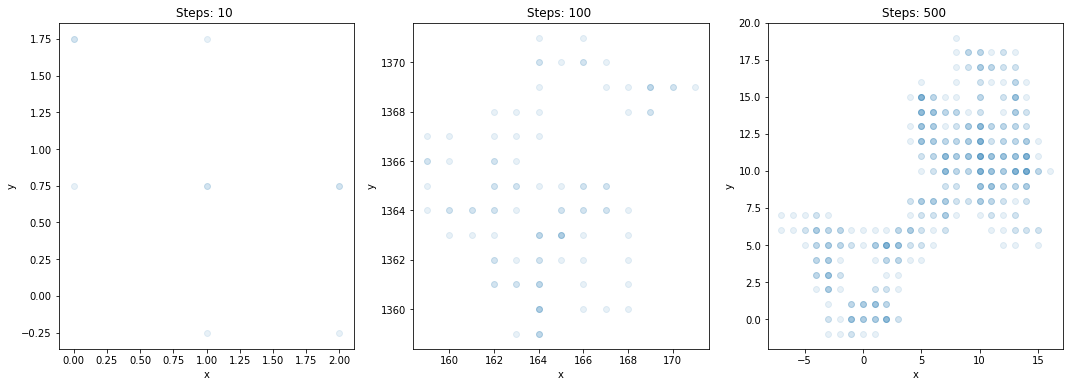

In [62]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

# this code is a template to create 3 subplots in one, adapt it to your task!

w = walker(numpy.zeros(1), ndim)

plt.figure(figsize=(18,6))


for i, nsteps in enumerate([10,100,500]):
    
    dim1 = []
    dim2 = []
    
    #rint(i)
    #rint(nsteps)
    path = w.doSteps(nsteps)
    
    print(path[i])
    
    for j in range (nsteps):
        dim1.append(path[j][0])
        dim2.append(path[j][1])
        
    
        
    plt.subplot(131+i)
   #plt.xlim((-3, 4))
  # plt.ylim((-3, 4))
    plt.title("Steps: {} ".format(nsteps))
    plt.scatter(dim1, dim2, alpha=0.1)
    plt.xlabel("x")
    plt.ylabel("y")